In [1]:
#pip install google-cloud-bigquery

In [2]:

from google.cloud import bigquery
import pandas as pd
import numpy as np

In [3]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="client_secret.json"

In [4]:
client = bigquery.Client()

In [5]:
hn_dataset_ref = client.dataset('stackoverflow', project='bigquery-public-data')
hn_dataset_ref

DatasetReference('bigquery-public-data', 'stackoverflow')

In [6]:
type(hn_dataset_ref)

google.cloud.bigquery.dataset.DatasetReference

In [7]:
hn_dset = client.get_dataset(hn_dataset_ref)
hn_dset

Dataset(DatasetReference('bigquery-public-data', 'stackoverflow'))

In [8]:
type(hn_dset)

google.cloud.bigquery.dataset.Dataset

In [9]:
[x.table_id for x in client.list_tables(hn_dset)]

['badges',
 'comments',
 'post_history',
 'post_links',
 'posts_answers',
 'posts_moderator_nomination',
 'posts_orphaned_tag_wiki',
 'posts_privilege_wiki',
 'posts_questions',
 'posts_tag_wiki',
 'posts_tag_wiki_excerpt',
 'posts_wiki_placeholder',
 'stackoverflow_posts',
 'tags',
 'users',
 'votes']

In [10]:
hn_full = client.get_table(table='bigquery-public-data.stackoverflow.posts_questions')
hn_full

Table(TableReference(DatasetReference('bigquery-public-data', 'stackoverflow'), 'posts_questions'))

In [11]:
type(hn_full)

google.cloud.bigquery.table.Table

In [12]:
query_job = client.query(
        """
        SELECT
        *
        FROM `bigquery-public-data.stackoverflow.posts_questions`
        WHERE accepted_answer_id is not null AND creation_date > '2021-01-01'
        ORDER BY accepted_answer_id
        LIMIT 10"""
    )

results = query_job.result()  # Waits for job to complete.
    # [END bigquery_simple_app_query]

    # [START bigquery_simple_app_print]
# for row in results:
#     print(row)
results_list = [row for row in results]

In [13]:
cols = [field.name for field in results.schema]

In [14]:
post_questions = pd.DataFrame.from_records(results_list, columns=cols)
post_questions

,id,title,body,accepted_answer_id,answer_count,comment_count,community_owned_date,creation_date,favorite_count,last_activity_date,last_edit_date,last_editor_display_name,last_editor_user_id,owner_display_name,owner_user_id,parent_id,post_type_id,score,tags,view_count
0,65526420,How to check if values in individiual rows of ...,<p>Suppose I have the following data.table:</p...,65526457,2,2,None,2021-01-01 00:05:46.310000+00:00,2.0,2021-01-01 02:15:42.223000+00:00,NaT,None,NaN,None,6335637,None,1,2,r|data.table|rowwise,62
1,65526423,d3.js : Generating axis ticks for ordinal values,<p>I want to use ordinal scale in x-axis with ...,65526533,1,0,None,2021-01-01 00:06:09.007000+00:00,NaN,2021-01-01 16:25:58.447000+00:00,NaT,None,NaN,None,9574155,None,1,2,javascript|d3.js,38
2,65526490,Is there a C macro that replaces varied length...,<p>I want to be able to:</p>\n<pre><code>#defi...,65526541,1,1,None,2021-01-01 00:20:09.553000+00:00,0.0,2021-01-01 00:37:24.277000+00:00,NaT,None,NaN,None,12743240,None,1,2,c|macros,35
3,65526419,How can I construct my objects allocated throu...,<p>C++20 removed the <code>construct()</code> ...,65526554,2,0,None,2021-01-01 00:05:43.627000+00:00,NaN,2021-01-01 18:19:46.870000+00:00,2021-01-01 05:23:28.560000+00:00,None,65863.0,None,14694500,None,1,3,c++|std|c++20|allocator,178
4,65526523,Navigate from parent to child in react where e...,<p>In a React app with a parent and child elem...,65526577,1,1,None,2021-01-01 00:30:31.933000+00:00,NaN,2021-01-01 00:46:22.813000+00:00,2021-01-01 00:35:53.623000+00:00,None,8690857.0,None,3002584,None,1,1,reactjs|react-router|react-router-dom,33
5,65526451,How do I define a field in a subclass by stric...,<p>I'm trying to implement the UML diagram bel...,65526589,1,0,None,2021-01-01 00:11:17.787000+00:00,NaN,2021-01-01 10:22:51.790000+00:00,2021-01-01 10:22:51.790000+00:00,None,2458991.0,None,14634129,None,1,1,java|inheritance|uml,50
6,65526591,How to install Python 3.5.x on Ubuntu 18.04 LT...,<p>Simple question: How to install Python 3.5....,65526611,2,1,None,2021-01-01 00:49:45.320000+00:00,NaN,2021-01-01 09:48:41.703000+00:00,NaT,None,NaN,None,6305105,None,1,0,python|ubuntu,73
7,65526474,GDB: Displaying incorrect values in struct,<p>I'm trying to implement the <code>malloc</c...,65526637,1,0,None,2021-01-01 00:16:10.673000+00:00,NaN,2021-01-01 01:02:22.447000+00:00,2021-01-01 00:39:32.250000+00:00,None,1233251.0,None,11035194,None,1,1,struct|gdb|memory-address,32
8,65526590,Vue2 + laravel6 - Component implementation,<p>I just started using Vue2 with Laravel6 and...,65526639,1,0,None,2021-01-01 00:49:32.030000+00:00,NaN,2021-01-01 01:09:45.250000+00:00,2021-01-01 01:07:22.133000+00:00,None,11960598.0,None,14605909,None,1,0,laravel|vue.js|vuejs2|laravel-6,37
9,65526522,Mobile menu css,<p>What's the best way to\nachieve going from ...,65526667,2,0,None,2021-01-01 00:30:28.633000+00:00,NaN,2021-01-01 01:46:35.280000+00:00,NaT,None,NaN,None,6787542,None,1,0,css,38


In [15]:
# Pull only relevant columns to ML model
# Sample data limited to June 2021, will scale up for next steps
query_job = client.query(
        """
        SELECT
        id, accepted_answer_id, creation_date, tags
        FROM `bigquery-public-data.stackoverflow.posts_questions`
        WHERE accepted_answer_id is not null AND creation_date > '2021-05-01'
        ORDER BY accepted_answer_id"""
    )

results = query_job.result()  # Waits for job to complete.
    # [END bigquery_simple_app_query]

    # [START bigquery_simple_app_print]
# for row in results:
#     print(row)
results_list = [row for row in results]

In [16]:
cols = ['id', 'accepted_answer_id', 'question_creation_date', 'tags']

In [17]:
post_questions = pd.DataFrame.from_records(results_list, columns=cols)
post_questions

,id,accepted_answer_id,question_creation_date,tags
0,67341742,67341801,2021-05-01 00:03:03.923000+00:00,javascript|html|node.js|obs
1,67341817,67341857,2021-05-01 00:17:39.380000+00:00,z3|smt|formal-methods|satisfiability|cvc4
2,67341895,67341911,2021-05-01 00:32:18.187000+00:00,python|numpy
3,67341936,67341961,2021-05-01 00:41:17.673000+00:00,python
4,67341921,67341974,2021-05-01 00:38:52.743000+00:00,laravel-8|vuejs3
...,...,...,...,...
47052,67531286,67757704,2021-05-14 08:28:20.750000+00:00,python|random
47053,67757579,67757716,2021-05-30 04:02:47.097000+00:00,postgresql|haskell
47054,67757723,67757776,2021-05-30 04:38:50.357000+00:00,html|google-sheets
47055,67757792,67757830,2021-05-30 04:50:54.750000+00:00,javascript|regex


In [18]:
query_job = client.query(
        """
        SELECT
        *
        FROM `bigquery-public-data.stackoverflow.posts_answers`
        WHERE creation_date > '2021-01-01'
        ORDER BY id
        LIMIT 10"""
    )

results = query_job.result()  # Waits for job to complete.
    # [END bigquery_simple_app_query]

    # [START bigquery_simple_app_print]
# for row in results:
#     print(row)
results_list = [row for row in results]

In [19]:
cols = [field.name for field in results.schema]

In [20]:
post_answers = pd.DataFrame.from_records(results_list, columns=cols)
post_answers

,id,title,body,accepted_answer_id,answer_count,comment_count,community_owned_date,creation_date,favorite_count,last_activity_date,last_edit_date,last_editor_display_name,last_editor_user_id,owner_display_name,owner_user_id,parent_id,post_type_id,score,tags,view_count
0,65526388,None,<p>Here is one solution. You can first do a gr...,None,None,0,None,2021-01-01 00:00:01.653000+00:00,None,2021-01-01 00:00:01.653000+00:00,NaT,None,NaN,None,4520420,65525964,2,2,None,None
1,65526389,None,<p>Echoing from the individual threads can be ...,None,None,0,None,2021-01-01 00:00:11.187000+00:00,None,2021-01-01 00:00:11.187000+00:00,NaT,None,NaN,None,342497,54217345,2,0,None,None
2,65526391,None,"<p>I have found similar code here (<a href=""ht...",None,None,5,None,2021-01-01 00:00:41.780000+00:00,None,2021-01-01 00:00:41.780000+00:00,NaT,None,NaN,None,13436156,65526354,2,0,None,None
3,65526393,None,"<p>Encountered the same error, just wanna add ...",None,None,0,None,2021-01-01 00:01:25.723000+00:00,None,2021-01-01 00:01:25.723000+00:00,NaT,None,NaN,None,12552972,48184969,2,0,None,None
4,65526394,None,<p>It's difficult to have all three types of v...,None,None,6,None,2021-01-01 00:01:33.950000+00:00,None,2021-01-01 00:01:33.950000+00:00,NaT,None,NaN,None,12602208,65525938,2,0,None,None
5,65526395,None,<p>to be able to change other user passwords y...,None,None,0,None,2021-01-01 00:01:32.977000+00:00,None,2021-01-01 00:01:32.977000+00:00,NaT,None,NaN,None,5562372,65523941,2,0,None,None
6,65526398,None,<blockquote>\n<p>Is it safe (and possible?) to...,None,None,2,None,2021-01-01 00:01:52.123000+00:00,None,2021-01-01 00:09:28.470000+00:00,2021-01-01 00:09:28.470000+00:00,None,14660.0,None,14660,65526234,2,1,None,None
7,65526403,None,<pre><code>def shuffle(deck):\n split_deck ...,None,None,0,None,2021-01-01 00:02:34.570000+00:00,None,2021-01-01 00:02:34.570000+00:00,NaT,None,NaN,None,4718350,65526315,2,1,None,None
8,65526404,None,"<p>FYI, here's a simple app that will do what ...",None,None,1,None,2021-01-01 00:02:40.090000+00:00,None,2021-01-01 00:09:09.673000+00:00,2021-01-01 00:09:09.673000+00:00,None,816620.0,None,816620,65514069,2,0,None,None
9,65526405,None,<p>First you'll want to check if there is no r...,None,None,0,None,2021-01-01 00:02:40.743000+00:00,None,2021-01-01 00:22:23.763000+00:00,2021-01-01 00:22:23.763000+00:00,None,14560865.0,None,14560865,65526331,2,2,None,None


In [21]:
# Pull only relevant columns to ML model
query_job = client.query(
        """
        SELECT
        id, creation_date
        FROM `bigquery-public-data.stackoverflow.posts_answers`
        WHERE creation_date > '2021-05-01'
        ORDER BY id"""
    )

results = query_job.result()  # Waits for job to complete.
    # [END bigquery_simple_app_query]

    # [START bigquery_simple_app_print]
# for row in results:
#     print(row)
results_list = [row for row in results]

In [22]:
cols = ['answer_id', 'answer_creation_date']

In [23]:
post_answers = pd.DataFrame.from_records(results_list, columns=cols)
post_answers

,answer_id,answer_creation_date
0,67341731,2021-05-01 00:00:43.057000+00:00
1,67341735,2021-05-01 00:02:14.853000+00:00
2,67341736,2021-05-01 00:02:18.417000+00:00
3,67341740,2021-05-01 00:02:59.713000+00:00
4,67341741,2021-05-01 00:03:03.637000+00:00
...,...,...
169650,67757977,2021-05-30 05:25:20.073000+00:00
169651,67757978,2021-05-30 05:25:23.510000+00:00
169652,67757979,2021-05-30 05:25:34.620000+00:00
169653,67757981,2021-05-30 05:25:46.913000+00:00


In [24]:
post_questions = post_questions.rename(columns={"id":"parent_id"})
post_questions

,parent_id,accepted_answer_id,question_creation_date,tags
0,67341742,67341801,2021-05-01 00:03:03.923000+00:00,javascript|html|node.js|obs
1,67341817,67341857,2021-05-01 00:17:39.380000+00:00,z3|smt|formal-methods|satisfiability|cvc4
2,67341895,67341911,2021-05-01 00:32:18.187000+00:00,python|numpy
3,67341936,67341961,2021-05-01 00:41:17.673000+00:00,python
4,67341921,67341974,2021-05-01 00:38:52.743000+00:00,laravel-8|vuejs3
...,...,...,...,...
47052,67531286,67757704,2021-05-14 08:28:20.750000+00:00,python|random
47053,67757579,67757716,2021-05-30 04:02:47.097000+00:00,postgresql|haskell
47054,67757723,67757776,2021-05-30 04:38:50.357000+00:00,html|google-sheets
47055,67757792,67757830,2021-05-30 04:50:54.750000+00:00,javascript|regex


In [25]:
merged_df = pd.merge(post_questions, post_answers, left_on=  ['accepted_answer_id'],
                   right_on= ['answer_id'], 
                   how = 'left')
merged_df

,parent_id,accepted_answer_id,question_creation_date,tags,answer_id,answer_creation_date
0,67341742,67341801,2021-05-01 00:03:03.923000+00:00,javascript|html|node.js|obs,67341801,2021-05-01 00:14:38.340000+00:00
1,67341817,67341857,2021-05-01 00:17:39.380000+00:00,z3|smt|formal-methods|satisfiability|cvc4,67341857,2021-05-01 00:26:39.053000+00:00
2,67341895,67341911,2021-05-01 00:32:18.187000+00:00,python|numpy,67341911,2021-05-01 00:36:54.910000+00:00
3,67341936,67341961,2021-05-01 00:41:17.673000+00:00,python,67341961,2021-05-01 00:46:37.893000+00:00
4,67341921,67341974,2021-05-01 00:38:52.743000+00:00,laravel-8|vuejs3,67341974,2021-05-01 00:48:52.390000+00:00
...,...,...,...,...,...,...
47052,67531286,67757704,2021-05-14 08:28:20.750000+00:00,python|random,67757704,2021-05-30 04:35:06.557000+00:00
47053,67757579,67757716,2021-05-30 04:02:47.097000+00:00,postgresql|haskell,67757716,2021-05-30 04:37:58.840000+00:00
47054,67757723,67757776,2021-05-30 04:38:50.357000+00:00,html|google-sheets,67757776,2021-05-30 04:48:57.807000+00:00
47055,67757792,67757830,2021-05-30 04:50:54.750000+00:00,javascript|regex,67757830,2021-05-30 04:57:39.123000+00:00


In [26]:
# Compare accepted_answer_id and answer_id to verify identical
merged_df['accepted_answer_id'].equals(merged_df['answer_id'])

True

In [27]:
# Drop "answer_id" column because redundant
merged_df = merged_df.drop(columns=['answer_id'])
merged_df

,parent_id,accepted_answer_id,question_creation_date,tags,answer_creation_date
0,67341742,67341801,2021-05-01 00:03:03.923000+00:00,javascript|html|node.js|obs,2021-05-01 00:14:38.340000+00:00
1,67341817,67341857,2021-05-01 00:17:39.380000+00:00,z3|smt|formal-methods|satisfiability|cvc4,2021-05-01 00:26:39.053000+00:00
2,67341895,67341911,2021-05-01 00:32:18.187000+00:00,python|numpy,2021-05-01 00:36:54.910000+00:00
3,67341936,67341961,2021-05-01 00:41:17.673000+00:00,python,2021-05-01 00:46:37.893000+00:00
4,67341921,67341974,2021-05-01 00:38:52.743000+00:00,laravel-8|vuejs3,2021-05-01 00:48:52.390000+00:00
...,...,...,...,...,...
47052,67531286,67757704,2021-05-14 08:28:20.750000+00:00,python|random,2021-05-30 04:35:06.557000+00:00
47053,67757579,67757716,2021-05-30 04:02:47.097000+00:00,postgresql|haskell,2021-05-30 04:37:58.840000+00:00
47054,67757723,67757776,2021-05-30 04:38:50.357000+00:00,html|google-sheets,2021-05-30 04:48:57.807000+00:00
47055,67757792,67757830,2021-05-30 04:50:54.750000+00:00,javascript|regex,2021-05-30 04:57:39.123000+00:00


In [28]:
# Add column for day of question_creation_date [question_day]
merged_df['question_day'] = merged_df['question_creation_date'].dt.day_name()
merged_df

,parent_id,accepted_answer_id,question_creation_date,tags,answer_creation_date,question_day
0,67341742,67341801,2021-05-01 00:03:03.923000+00:00,javascript|html|node.js|obs,2021-05-01 00:14:38.340000+00:00,Saturday
1,67341817,67341857,2021-05-01 00:17:39.380000+00:00,z3|smt|formal-methods|satisfiability|cvc4,2021-05-01 00:26:39.053000+00:00,Saturday
2,67341895,67341911,2021-05-01 00:32:18.187000+00:00,python|numpy,2021-05-01 00:36:54.910000+00:00,Saturday
3,67341936,67341961,2021-05-01 00:41:17.673000+00:00,python,2021-05-01 00:46:37.893000+00:00,Saturday
4,67341921,67341974,2021-05-01 00:38:52.743000+00:00,laravel-8|vuejs3,2021-05-01 00:48:52.390000+00:00,Saturday
...,...,...,...,...,...,...
47052,67531286,67757704,2021-05-14 08:28:20.750000+00:00,python|random,2021-05-30 04:35:06.557000+00:00,Friday
47053,67757579,67757716,2021-05-30 04:02:47.097000+00:00,postgresql|haskell,2021-05-30 04:37:58.840000+00:00,Sunday
47054,67757723,67757776,2021-05-30 04:38:50.357000+00:00,html|google-sheets,2021-05-30 04:48:57.807000+00:00,Sunday
47055,67757792,67757830,2021-05-30 04:50:54.750000+00:00,javascript|regex,2021-05-30 04:57:39.123000+00:00,Sunday


In [29]:
# Add column for hour value of question_creation_date [question_time]
merged_df['question_hour'] = merged_df['question_creation_date'].dt.hour
merged_df['question_hour_min'] = merged_df['question_creation_date'].dt.strftime('%H:%M')

merged_df

,parent_id,accepted_answer_id,question_creation_date,tags,answer_creation_date,question_day,question_hour,question_hour_min
0,67341742,67341801,2021-05-01 00:03:03.923000+00:00,javascript|html|node.js|obs,2021-05-01 00:14:38.340000+00:00,Saturday,0,00:03
1,67341817,67341857,2021-05-01 00:17:39.380000+00:00,z3|smt|formal-methods|satisfiability|cvc4,2021-05-01 00:26:39.053000+00:00,Saturday,0,00:17
2,67341895,67341911,2021-05-01 00:32:18.187000+00:00,python|numpy,2021-05-01 00:36:54.910000+00:00,Saturday,0,00:32
3,67341936,67341961,2021-05-01 00:41:17.673000+00:00,python,2021-05-01 00:46:37.893000+00:00,Saturday,0,00:41
4,67341921,67341974,2021-05-01 00:38:52.743000+00:00,laravel-8|vuejs3,2021-05-01 00:48:52.390000+00:00,Saturday,0,00:38
...,...,...,...,...,...,...,...,...
47052,67531286,67757704,2021-05-14 08:28:20.750000+00:00,python|random,2021-05-30 04:35:06.557000+00:00,Friday,8,08:28
47053,67757579,67757716,2021-05-30 04:02:47.097000+00:00,postgresql|haskell,2021-05-30 04:37:58.840000+00:00,Sunday,4,04:02
47054,67757723,67757776,2021-05-30 04:38:50.357000+00:00,html|google-sheets,2021-05-30 04:48:57.807000+00:00,Sunday,4,04:38
47055,67757792,67757830,2021-05-30 04:50:54.750000+00:00,javascript|regex,2021-05-30 04:57:39.123000+00:00,Sunday,4,04:50


In [30]:
# Add column for duration till accepted answer (answer_creation_date - question_creation_date)
merged_df['accepted_answer_duration'] = (merged_df['answer_creation_date']-merged_df['question_creation_date'])/np.timedelta64(1,'h')
merged_df = merged_df.sort_values(by='accepted_answer_duration', ascending=False)
merged_df

,parent_id,accepted_answer_id,question_creation_date,tags,answer_creation_date,question_day,question_hour,question_hour_min,accepted_answer_duration
46975,67342099,67756344,2021-05-01 01:19:14.210000+00:00,ios|swift|uibezierpath|rounded-corners|spacing,2021-05-29 22:57:23.117000+00:00,Saturday,1,01:19,693.635808
45777,67349217,67741551,2021-05-01 17:43:24.997000+00:00,javascript|css,2021-05-28 15:18:48.583000+00:00,Saturday,17,17:43,645.589885
46098,67352708,67744939,2021-05-02 03:20:42.240000+00:00,python|django,2021-05-28 20:10:38.163000+00:00,Sunday,3,03:20,640.832201
41532,67349112,67699250,2021-05-01 17:34:03.697000+00:00,django|class|django-rest-framework,2021-05-26 05:57:48.013000+00:00,Saturday,17,17:34,588.395643
46603,67399034,67750961,2021-05-05 09:56:23.113000+00:00,java|drag-and-drop|awt|netbeans-platform,2021-05-29 11:44:36.820000+00:00,Wednesday,9,09:56,577.803807
...,...,...,...,...,...,...,...,...,...
25782,67563037,67563038,2021-05-17 01:35:04.927000+00:00,android|android-studio|android-layout|keyboard...,2021-05-17 01:35:04.927000+00:00,Monday,1,01:35,0.000000
16408,67485503,67485504,2021-05-11 11:05:40.837000+00:00,kubernetes|apache-kafka|apache-zookeeper|yahoo...,2021-05-11 11:05:40.837000+00:00,Tuesday,11,11:05,0.000000
37859,67666770,67666771,2021-05-24 04:42:53.953000+00:00,mpdf,2021-05-24 04:42:53.953000+00:00,Monday,4,04:42,0.000000
25652,67561998,67561999,2021-05-16 22:14:34.137000+00:00,c#|formatting|t4,2021-05-16 22:14:34.137000+00:00,Sunday,22,22:14,0.000000


In [31]:
# Additional method to verify number of rows with zero response time (what's the possible explanation?)
zero_time = merged_df.groupby('accepted_answer_duration').count()
zero_time 

,parent_id,accepted_answer_id,question_creation_date,tags,answer_creation_date,question_day,question_hour,question_hour_min
accepted_answer_duration,,,,,,,,
0.000000,172,172,172,172,172,172,172,172
0.004931,1,1,1,1,1,1,1,1
0.005020,1,1,1,1,1,1,1,1
0.006600,1,1,1,1,1,1,1,1
0.007744,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
577.803807,1,1,1,1,1,1,1,1
588.395643,1,1,1,1,1,1,1,1
640.832201,1,1,1,1,1,1,1,1


In [32]:
# drop data rows where duration is 0
indexNames = merged_df[ merged_df['accepted_answer_duration'] == 0.000000 ].index
merged_df.drop(indexNames, inplace=True)
merged_df

,parent_id,accepted_answer_id,question_creation_date,tags,answer_creation_date,question_day,question_hour,question_hour_min,accepted_answer_duration
46975,67342099,67756344,2021-05-01 01:19:14.210000+00:00,ios|swift|uibezierpath|rounded-corners|spacing,2021-05-29 22:57:23.117000+00:00,Saturday,1,01:19,693.635808
45777,67349217,67741551,2021-05-01 17:43:24.997000+00:00,javascript|css,2021-05-28 15:18:48.583000+00:00,Saturday,17,17:43,645.589885
46098,67352708,67744939,2021-05-02 03:20:42.240000+00:00,python|django,2021-05-28 20:10:38.163000+00:00,Sunday,3,03:20,640.832201
41532,67349112,67699250,2021-05-01 17:34:03.697000+00:00,django|class|django-rest-framework,2021-05-26 05:57:48.013000+00:00,Saturday,17,17:34,588.395643
46603,67399034,67750961,2021-05-05 09:56:23.113000+00:00,java|drag-and-drop|awt|netbeans-platform,2021-05-29 11:44:36.820000+00:00,Wednesday,9,09:56,577.803807
...,...,...,...,...,...,...,...,...,...
12265,67450739,67450745,2021-05-08 18:12:53.640000+00:00,r|dataframe|ggplot2,2021-05-08 18:13:25.640000+00:00,Saturday,18,18:12,0.008889
12316,67451178,67451182,2021-05-08 19:03:44.257000+00:00,r|string,2021-05-08 19:04:12.137000+00:00,Saturday,19,19:03,0.007744
19631,67512565,67512567,2021-05-13 00:35:23.640000+00:00,sql|sql-server|tsql,2021-05-13 00:35:47.400000+00:00,Thursday,0,00:35,0.006600
8154,67415161,67415165,2021-05-06 09:13:30.220000+00:00,spring-boot|mybatis|lombok,2021-05-06 09:13:48.293000+00:00,Thursday,9,09:13,0.005020


In [33]:
merged_df['no_of_tags'] = merged_df['tags'].apply(lambda x: len(x.split('|')))
merged_df.head()

,parent_id,accepted_answer_id,question_creation_date,tags,answer_creation_date,question_day,question_hour,question_hour_min,accepted_answer_duration,no_of_tags
46975,67342099,67756344,2021-05-01 01:19:14.210000+00:00,ios|swift|uibezierpath|rounded-corners|spacing,2021-05-29 22:57:23.117000+00:00,Saturday,1,01:19,693.635808,5
45777,67349217,67741551,2021-05-01 17:43:24.997000+00:00,javascript|css,2021-05-28 15:18:48.583000+00:00,Saturday,17,17:43,645.589885,2
46098,67352708,67744939,2021-05-02 03:20:42.240000+00:00,python|django,2021-05-28 20:10:38.163000+00:00,Sunday,3,03:20,640.832201,2
41532,67349112,67699250,2021-05-01 17:34:03.697000+00:00,django|class|django-rest-framework,2021-05-26 05:57:48.013000+00:00,Saturday,17,17:34,588.395643,3
46603,67399034,67750961,2021-05-05 09:56:23.113000+00:00,java|drag-and-drop|awt|netbeans-platform,2021-05-29 11:44:36.820000+00:00,Wednesday,9,09:56,577.803807,4


In [34]:
# create a subset of merged_df for ML model
#response_duration_ML_df = merged_df['accepted_answer_id', 'question_day', 'question_hour', 'question_hour_min', 'accepted_answer_duration']
#response_duration_ML_df

practice_ML_df = merged_df[['accepted_answer_id', 'question_creation_date', 'question_day', 'question_hour', 'question_hour_min', 'accepted_answer_duration']]
practice_ML_df

,accepted_answer_id,question_creation_date,question_day,question_hour,question_hour_min,accepted_answer_duration
46975,67756344,2021-05-01 01:19:14.210000+00:00,Saturday,1,01:19,693.635808
45777,67741551,2021-05-01 17:43:24.997000+00:00,Saturday,17,17:43,645.589885
46098,67744939,2021-05-02 03:20:42.240000+00:00,Sunday,3,03:20,640.832201
41532,67699250,2021-05-01 17:34:03.697000+00:00,Saturday,17,17:34,588.395643
46603,67750961,2021-05-05 09:56:23.113000+00:00,Wednesday,9,09:56,577.803807
...,...,...,...,...,...,...
12265,67450745,2021-05-08 18:12:53.640000+00:00,Saturday,18,18:12,0.008889
12316,67451182,2021-05-08 19:03:44.257000+00:00,Saturday,19,19:03,0.007744
19631,67512567,2021-05-13 00:35:23.640000+00:00,Thursday,0,00:35,0.006600
8154,67415165,2021-05-06 09:13:30.220000+00:00,Thursday,9,09:13,0.005020


In [35]:
practice_ML_df.dtypes

accepted_answer_id                        int64
question_creation_date      datetime64[ns, UTC]
question_day                             object
question_hour                             int64
question_hour_min                        object
accepted_answer_duration                float64
dtype: object

In [36]:
import datetime 

dt = datetime.datetime.now()
seq = int(dt.strftime("%Y%m%d%H%M%S"))


In [37]:
day_to_number={"Sunday":1,
              "Monday":2,
               "Tuesday":3,
               "Wednesday":4,
               "Thursday":5,
               "Friday":6,
               "Saturday":7
              }

In [38]:
merged_df['question_day'] = merged_df['question_day'].apply(lambda x: day_to_number[x])
merged_df.head()

,parent_id,accepted_answer_id,question_creation_date,tags,answer_creation_date,question_day,question_hour,question_hour_min,accepted_answer_duration,no_of_tags
46975,67342099,67756344,2021-05-01 01:19:14.210000+00:00,ios|swift|uibezierpath|rounded-corners|spacing,2021-05-29 22:57:23.117000+00:00,7,1,01:19,693.635808,5
45777,67349217,67741551,2021-05-01 17:43:24.997000+00:00,javascript|css,2021-05-28 15:18:48.583000+00:00,7,17,17:43,645.589885,2
46098,67352708,67744939,2021-05-02 03:20:42.240000+00:00,python|django,2021-05-28 20:10:38.163000+00:00,1,3,03:20,640.832201,2
41532,67349112,67699250,2021-05-01 17:34:03.697000+00:00,django|class|django-rest-framework,2021-05-26 05:57:48.013000+00:00,7,17,17:34,588.395643,3
46603,67399034,67750961,2021-05-05 09:56:23.113000+00:00,java|drag-and-drop|awt|netbeans-platform,2021-05-29 11:44:36.820000+00:00,4,9,09:56,577.803807,4


## rough code 09/09/21 starts

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np




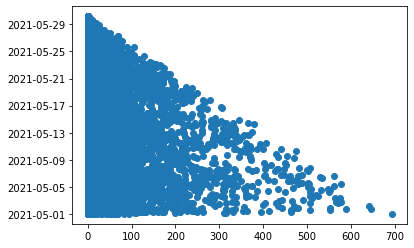

In [40]:


plt.scatter(merged_df.accepted_answer_duration, merged_df.question_creation_date)

plt.show()

In [41]:
# #standardize the data to fit sklearn library
# X = merged_df[['answer_creation_date']].values.reshape(-1, 1)
# y = merged_df['accepted_answer_duration']
# print("Shape: ", X.shape, y.shape)


In [42]:
#standardize the data to fit sklearn library
X = merged_df[['question_day', 'question_hour', 'no_of_tags']]
y = merged_df['accepted_answer_duration']
print("Shape: ", X.shape, y.shape)

Shape:  (46885, 3) (46885,)


In [43]:
#split the data into training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [44]:
print("X_train {}, y_train {}".format(X_train.shape, y_train.shape))
print("X_test {}, y_test {}".format(X_test.shape, y_test.shape))

X_train (37508, 3), y_train (37508,)
X_test (9377, 3), y_test (9377,)


In [45]:
X_train

,question_day,question_hour,no_of_tags
9904,5,13,5
16441,3,11,2
29062,3,15,4
12550,7,23,4
9247,5,17,5
...,...,...,...
14800,2,14,3
45478,1,5,5
27585,2,23,5
37196,7,14,5


In [46]:
 # Create the model

from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [47]:
 # Fit the model to the training data. 
model.fit(X_train, y_train)


LinearRegression()

## Multiple Linear Regression

In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [86]:
X = merged_df[['question_hour','no_of_tags', ]]
y = merged_df['accepted_answer_duration']
X.head(10)

,question_hour,no_of_tags
46975,1,5
45777,17,2
46098,3,2
41532,17,3
46603,9,4
42954,19,4
43761,10,2
42559,19,4
41622,13,4
41769,18,5


In [87]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size =0.2)
# print the data
X_train

,question_hour,no_of_tags
6652,3,3
40954,18,1
17784,3,4
21279,18,3
13121,12,2
...,...,...
29299,9,5
43138,22,1
17462,8,1
13723,23,5


In [88]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

In [89]:
clf.fit(X_train,y_train)

LinearRegression()

In [90]:
y_pred = clf.predict(X_test)

In [91]:
 from sklearn.metrics import mean_squared_error, r2_score

# Score the prediction with MSE and R2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"mean squared error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

mean squared error (MSE): 1644.8605789452365
R-squared (R2 ): 0.005155384448895961


## clf gives r2 score the higher the more accurate 

In [92]:
clf.score(X_test,y_test)

0.005155384448895961

## 2nd model with practice_ML_df

In [93]:
X = practice_ML_df[['question_hour','question_day']]
y = practice_ML_df['accepted_answer_duration']
X.head(10)

,question_hour,question_day
46975,1,Saturday
45777,17,Saturday
46098,3,Sunday
41532,17,Saturday
46603,9,Wednesday
42954,19,Sunday
43761,10,Monday
42559,19,Sunday
41622,13,Sunday
41769,18,Sunday


In [94]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size =0.2)
# print the data
X_train

,question_hour,question_day
876,20,Saturday
16373,10,Tuesday
42004,10,Wednesday
19662,0,Thursday
3073,15,Monday
...,...,...
27097,17,Monday
21399,4,Thursday
23997,15,Saturday
35826,12,Saturday


In [95]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

In [96]:
clf.fit(X_train,y_train)

ValueError: could not convert string to float: 'Saturday'

In [97]:
clf.predict(X_test)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [98]:
clf.score(X_test,y_test)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.